## HDFC Stock Price Prediction Using LSTM(Long Short-Term Memory) 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


### Load and Analyze Data

In [18]:
hdfc = pd.read_csv(r"HDFCBANK.BO.csv")

In [19]:
hdfc.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,476.000000,476.524994,473.125000,475.649994,449.683533,106832.0
1,2015-01-02,476.024994,484.500000,476.024994,482.475006,456.135956,449590.0
2,2015-01-05,484.899994,486.149994,477.575012,478.325012,452.212524,465650.0
3,2015-01-06,477.500000,478.225006,468.850006,471.325012,445.594635,154052.0
4,2015-01-07,471.049988,475.500000,466.000000,472.674988,446.870911,93128.0
5,2015-01-08,477.399994,484.500000,474.450012,482.250000,455.923248,339724.0
6,2015-01-09,484.924988,489.625000,483.424988,487.350006,460.744843,413504.0
7,2015-01-12,485.000000,487.149994,482.049988,484.049988,457.624939,213590.0
8,2015-01-13,485.500000,485.725006,478.000000,481.774994,455.474152,466444.0
9,2015-01-14,481.200012,487.149994,480.125000,481.674988,455.379608,126106.0


In [20]:
hdfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1993 non-null   object 
 1   Open       1988 non-null   float64
 2   High       1988 non-null   float64
 3   Low        1988 non-null   float64
 4   Close      1988 non-null   float64
 5   Adj Close  1988 non-null   float64
 6   Volume     1988 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.1+ KB


In [21]:
 hdfc_NEW=hdfc.dropna(axis=0)
 hdfc_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,476.000000,476.524994,473.125000,475.649994,449.683533,106832.0
1,2015-01-02,476.024994,484.500000,476.024994,482.475006,456.135956,449590.0
2,2015-01-05,484.899994,486.149994,477.575012,478.325012,452.212524,465650.0
3,2015-01-06,477.500000,478.225006,468.850006,471.325012,445.594635,154052.0
4,2015-01-07,471.049988,475.500000,466.000000,472.674988,446.870911,93128.0
...,...,...,...,...,...,...,...
1988,2023-01-17,1592.000000,1610.800049,1577.699951,1608.599976,1590.366333,261717.0
1989,2023-01-18,1607.900024,1641.000000,1601.000000,1636.949951,1618.394897,161546.0
1990,2023-01-19,1630.050049,1649.349976,1630.050049,1644.099976,1625.463867,94163.0
1991,2023-01-20,1643.800049,1668.000000,1642.599976,1660.800049,1641.974609,758155.0


In [22]:
hdfc_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1992
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1988 non-null   object 
 1   Open       1988 non-null   float64
 2   High       1988 non-null   float64
 3   Low        1988 non-null   float64
 4   Close      1988 non-null   float64
 5   Adj Close  1988 non-null   float64
 6   Volume     1988 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.2+ KB


In [23]:
hdfc_NEW['Close']=pd.to_numeric(hdfc_NEW.Close,errors='coerce')
hdfc_NEW = hdfc_NEW.dropna()
hdfc_TRAIN = hdfc_NEW.iloc[:,4:5].values

C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_24732\1111499696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfc_NEW['Close']=pd.to_numeric(hdfc_NEW.Close,errors='coerce')


In [24]:
hdfc_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1992
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1988 non-null   object 
 1   Open       1988 non-null   float64
 2   High       1988 non-null   float64
 3   Low        1988 non-null   float64
 4   Close      1988 non-null   float64
 5   Adj Close  1988 non-null   float64
 6   Volume     1988 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.2+ KB


### Min-Max Scaling

In [25]:
sc = MinMaxScaler(feature_range=(0,1))
hdfc_TRAIN = sc.fit_transform(hdfc_TRAIN)
hdfc_TRAIN.shape

(1988, 1)

### Train Test Split

In [26]:
x_train = []
y_train = []

for i in range (60,1227):
  x_train.append(hdfc_TRAIN[i-60:i,0])
  y_train.append(hdfc_TRAIN[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1167, 60, 1)

### LSTM Model

#### Model Training

In [28]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

#### Model Training

In [29]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=32, verbose=2)

Epoch 1/25
37/37 - 8s - loss: 0.0122 - 8s/epoch - 227ms/step
Epoch 2/25
37/37 - 3s - loss: 0.0015 - 3s/epoch - 86ms/step
Epoch 3/25
37/37 - 3s - loss: 0.0012 - 3s/epoch - 83ms/step
Epoch 4/25
37/37 - 3s - loss: 0.0013 - 3s/epoch - 81ms/step
Epoch 5/25
37/37 - 3s - loss: 0.0011 - 3s/epoch - 77ms/step
Epoch 6/25
37/37 - 3s - loss: 0.0011 - 3s/epoch - 86ms/step
Epoch 7/25
37/37 - 3s - loss: 0.0011 - 3s/epoch - 84ms/step
Epoch 8/25
37/37 - 4s - loss: 0.0012 - 4s/epoch - 96ms/step
Epoch 9/25
37/37 - 3s - loss: 0.0011 - 3s/epoch - 88ms/step
Epoch 10/25
37/37 - 3s - loss: 0.0010 - 3s/epoch - 84ms/step
Epoch 11/25
37/37 - 3s - loss: 9.9228e-04 - 3s/epoch - 81ms/step
Epoch 12/25
37/37 - 3s - loss: 9.8594e-04 - 3s/epoch - 82ms/step
Epoch 13/25
37/37 - 3s - loss: 9.1186e-04 - 3s/epoch - 83ms/step
Epoch 14/25
37/37 - 3s - loss: 8.6428e-04 - 3s/epoch - 83ms/step
Epoch 15/25
37/37 - 3s - loss: 9.5107e-04 - 3s/epoch - 87ms/step
Epoch 16/25
37/37 - 3s - loss: 9.1324e-04 - 3s/epoch - 85ms/step
Epoch 17

#### Loss Plot

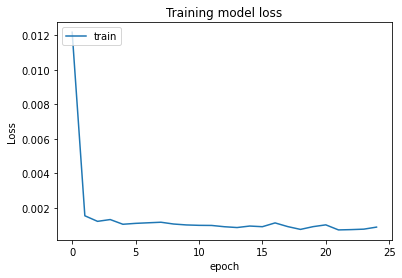

In [30]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [31]:
hdfc_NEW.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Prediction On Test Data

In [32]:
hdfc_TEST = pd.read_csv(r"HDFCBANK.BO.csv")
hdfc_TEST["Close"]=pd.to_numeric(hdfc_TEST.Close, errors='coerce')
hdfc_TEST = hdfc_TEST.dropna()
hdfc_TEST = hdfc_TEST.iloc[:,4:5]
y_test = hdfc_TEST.iloc[60:,0:].values

inputClosing = hdfc_TEST.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(hdfc_TEST)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape


(1928, 60, 1)

In [33]:
y_predict = model.predict(x_test)
y_predict

61/61 [==============================] - 2s 21ms/step


array([[0.05200117],
       [0.05060305],
       [0.04921299],
       ...,
       [0.88447595],
       [0.8841405 ],
       [0.8851524 ]], dtype=float32)

In [34]:
predicted_price = sc.inverse_transform(y_predict)

### Plot Of Actual & Predicted Stock Price

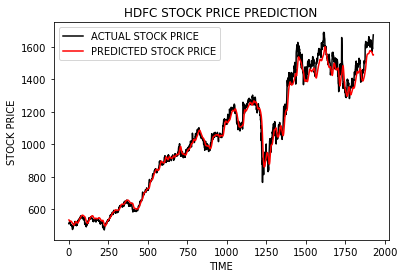

In [35]:
plt.plot(y_test, color='black', label='ACTUAL STOCK PRICE')
plt.plot(predicted_price, color='red', label='PREDICTED STOCK PRICE')
plt.title('HDFC STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.show()